In [1]:
import pandas as pd
import scipy.stats
import numpy as np
#import best
import matplotlib.pyplot as plt
import pymc3 as pm

data = pd.read_csv("dataFinal.csv")
data.head()

C:\Users\mltla\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mltla\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\mltla\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,sessionid,phoneids,prolificVersion,Completion,PHQ-Q1,PHQ-Q2,PHQ-Q3,PHQ-Q4,PHQ-Q5,PHQ-Q6,...,GAD-Q6,GAD-Q7,GAD-total,Gender,Age,studentStatus,depressionTreatment,Covid,WFH,Race/Ethnicity
0,00568a204761c742EQ4JETCS0,00568a204761c742,control,complete,0,0,1,1,0,0,...,0,0,0,Woman,24-39,"No, I am not a student",No,No/I don't know,Yes - Part Time,Hispanic/Latino
1,01ddd948426a2009PRSU5PFDZ,01ddd948426a2009,stereotype threat,complete,0,0,1,1,1,0,...,0,0,1,Man,40-55,"No, I am not a student",Yes,Yes,Yes - Full Time,White/Caucasian
2,023ffde796006c6e21Q5B0HU6,023ffde796006c6e,control,complete,0,0,0,0,0,0,...,1,0,2,Man,24-39,"Yes, I am a graduate student",No,No/I don't know,No - Not At All,White/Caucasian
3,035b89739144c3ec2L01TM7RR,035b89739144c3ec,control,complete,3,3,3,3,3,3,...,3,3,20,Man,24-39,"No, I am not a student",Yes,No/I don't know,No - Not At All,White/Caucasian
4,03d71aee534509beGGQCID86U,03d71aee534509be,control,complete,2,1,2,3,3,2,...,3,1,9,Woman,18-23,"No, I am not a student",Yes,No/I don't know,No - Not At All,White/Caucasian


In [2]:
man = data[(data.Gender == 'Man') & (data.depressionTreatment == 'Yes')]
manST = man[man.prolificVersion == 'stereotype threat']
manC = man[man.prolificVersion == 'control']
woman = data[(data.Gender == 'Woman') & (data.depressionTreatment == 'Yes')]
womanST = woman[woman.prolificVersion == 'stereotype threat']
womanC = woman[woman.prolificVersion == 'control']
other = data[(data.Gender == 'Other') & (data.depressionTreatment == 'Yes')]
otherST = other[other.prolificVersion == 'stereotype threat']
otherC = other[other.prolificVersion == 'control']

In [3]:
manST9 = list(map(int, manST["GAD-total"].to_numpy()))
manC9 = list(map(int, manC["GAD-total"].to_numpy()))
womanST9 = list(map(int, womanST["GAD-total"].to_numpy()))
womanC9 = list(map(int, womanC["GAD-total"].to_numpy()))
otherST9 = list(map(int, otherST["GAD-total"].to_numpy()))
otherC9 = list(map(int, otherC["GAD-total"].to_numpy()))

In [4]:
print("men")
print(len(manST9))
print(len(manC9))

print("women")
print(len(womanST9))
print(len(womanC9))

print("other")
print(len(otherST9))
print(len(otherC9))

men
28
36
women
54
49
other
4
5


In [5]:
print("men")
print(sum(manST9)/len(manST9))
print(np.std(manST9))
print(sum(manC9)/len(manC9))
print(np.std(manC9))
print(scipy.stats.ttest_ind(manST9, manC9))
print("women")
print(sum(womanST9)/len(womanST9))
print(np.std(womanST9))
print(sum(womanC9)/len(womanC9))
print(np.std(womanC9))
print(scipy.stats.ttest_ind(womanST9, womanC9))
print("other")
print(sum(otherST9)/len(otherST9))
print(np.std(otherST9))
print(sum(otherC9)/len(otherC9))
print(np.std(otherC9))
print(scipy.stats.ttest_ind(otherST9, otherC9))

men
8.928571428571429
5.599289313504574
10.527777777777779
5.899557945356354
Ttest_indResult(statistic=-1.0825956870556142, pvalue=0.28318045819461235)
women
12.574074074074074
6.060197563861392
11.020408163265307
5.207881765791536
Ttest_indResult(statistic=1.3751100309845736, pvalue=0.1721399931677182)
other
12.75
3.897114317029974
15.4
3.1999999999999997
Ttest_indResult(statistic=-0.9878172095895638, pvalue=0.3561488913112869)


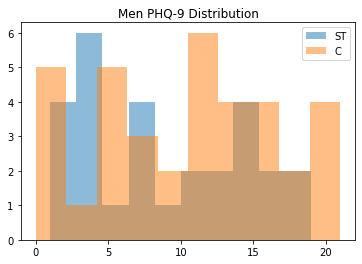

In [6]:
plt.hist(manST9, alpha = 0.5, label = "ST")
plt.hist(manC9, alpha = 0.5, label = "C")
plt.legend()
plt.title("Men PHQ-9 Distribution")
plt.show()

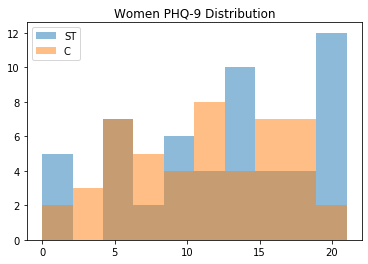

In [7]:
plt.hist(womanST9, alpha = 0.5, label = "ST")
plt.hist(womanC9, alpha = 0.5, label = "C")
plt.legend()
plt.title("Women PHQ-9 Distribution")
plt.show()

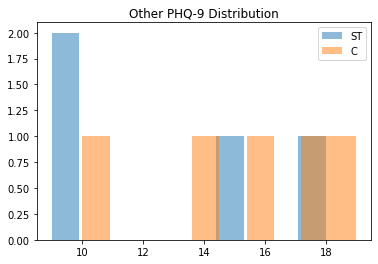

In [8]:
plt.hist(otherST9, alpha = 0.5, label = "ST")
plt.hist(otherC9, alpha = 0.5, label = "C")
plt.legend()
plt.title("Other PHQ-9 Distribution")
plt.show()

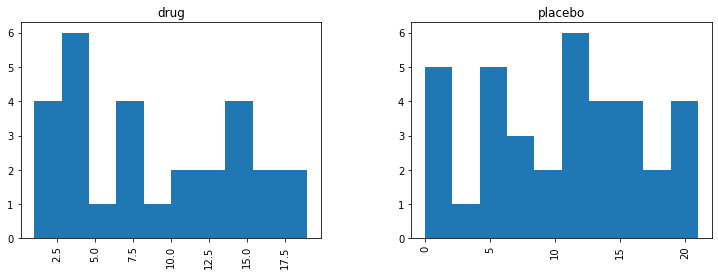

In [9]:
#https://docs.pymc.io/notebooks/BEST.html

drug = manST9
placebo = manC9

y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(
    dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
)

y.hist("value", by="group", figsize=(12, 4));

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The function `kdeplot` from PyMC3 is just an alias for `plot_kde` from ArviZ. Please switch to `pymc3.plot_kde` or `arviz.plot_kde`.


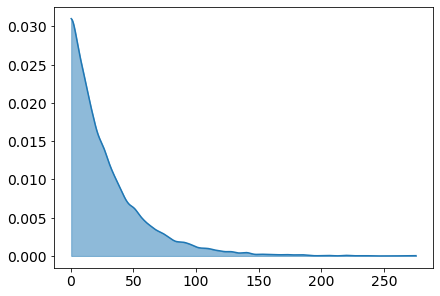

In [10]:
μ_m = y.value.mean()
μ_s = y.value.std() * 2

with pm.Model() as model:
    group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
    group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)
    
σ_low = 1
σ_high = 10

with model:
    group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)
    
with model:
    ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={"alpha": 0.5});

In [11]:
with model:
    λ1 = group1_std ** -2
    λ2 = group2_std ** -2

    group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
    group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

In [12]:
with model:
    diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
    effect_size = pm.Deterministic(
        "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
    )

In [13]:
with model:
    trace = pm.sample(2000)

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_me

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 706 seconds.


C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


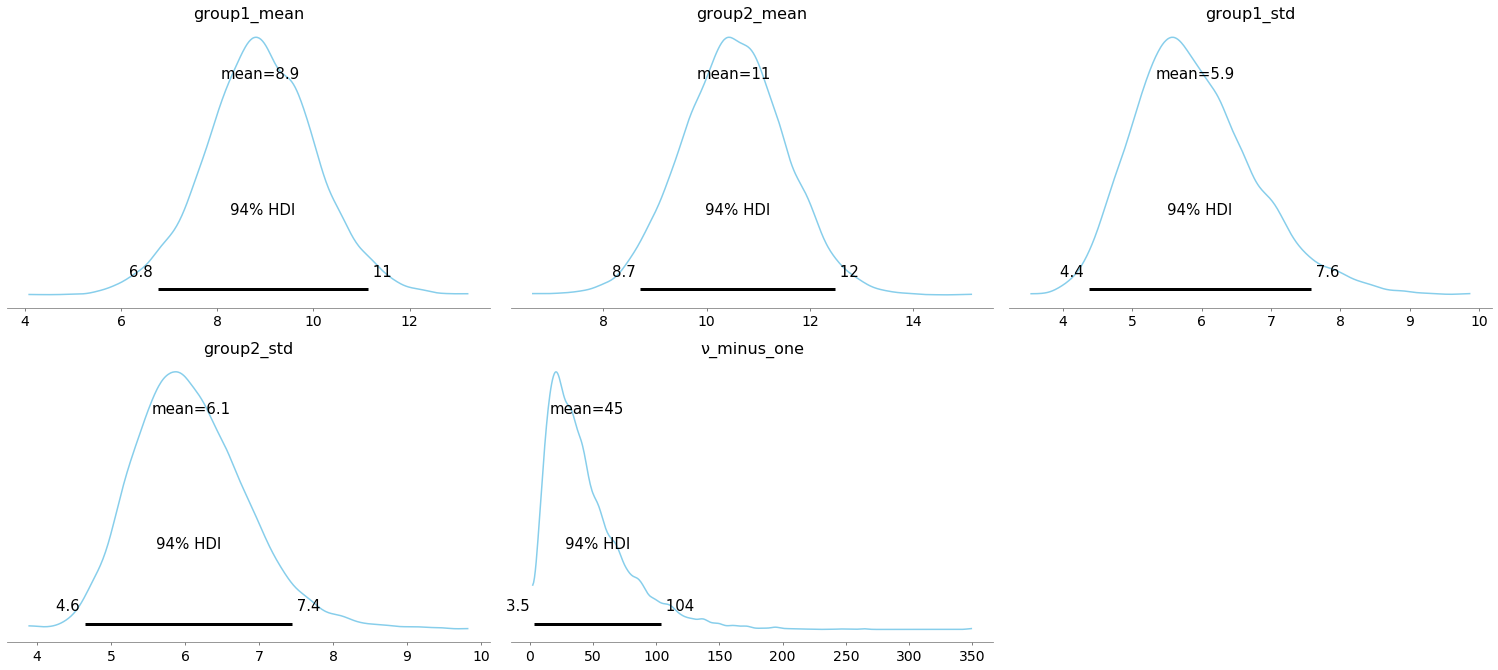

In [14]:
pm.plot_posterior(
    trace,
    var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "ν_minus_one"],
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


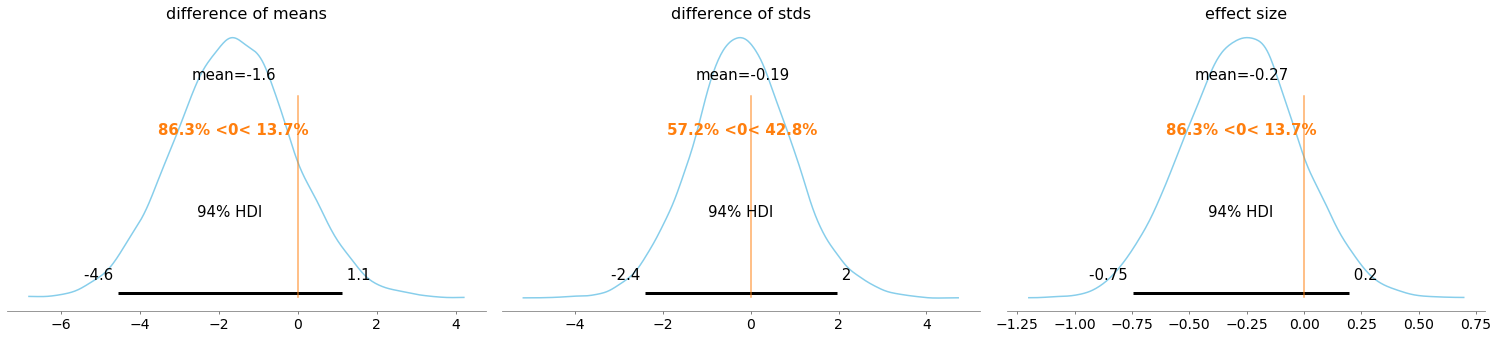

In [15]:
pm.plot_posterior(
    trace,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


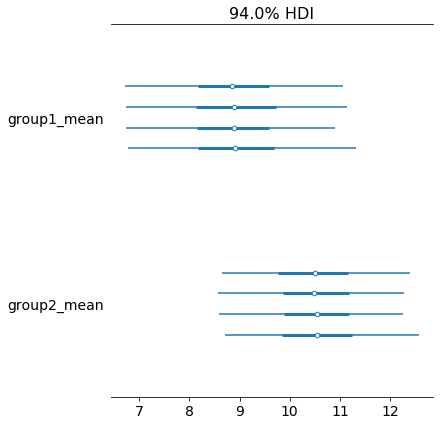

In [16]:
pm.forestplot(trace, var_names=["group1_mean", "group2_mean"]);

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


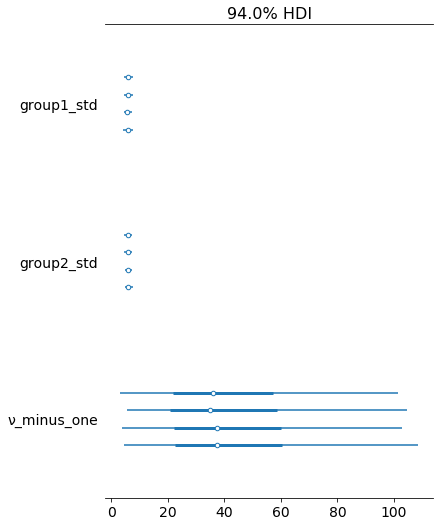

In [17]:
pm.forestplot(trace, var_names=["group1_std", "group2_std", "ν_minus_one"]);

In [18]:
pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"])

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
difference of means,-1.626,1.510,-4.563,1.115,0.017,0.013,7477.0,5775.0,1.0
difference of stds,-0.186,1.162,-2.417,1.973,0.016,0.015,5625.0,4324.0,1.0
effect size,-0.273,0.252,-0.747,0.195,0.003,0.002,7505.0,5797.0,1.0


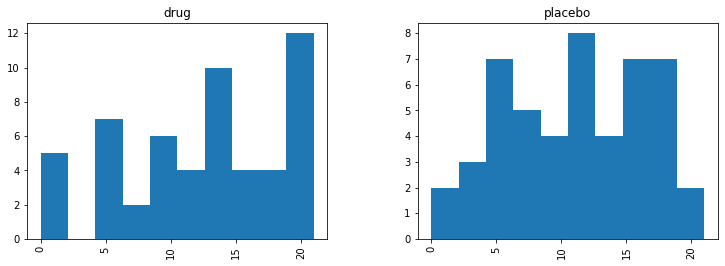

In [19]:
#https://docs.pymc.io/notebooks/BEST.html

drug = womanST9
placebo = womanC9

y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(
    dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
)

y.hist("value", by="group", figsize=(12, 4));

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The function `kdeplot` from PyMC3 is just an alias for `plot_kde` from ArviZ. Please switch to `pymc3.plot_kde` or `arviz.plot_kde`.


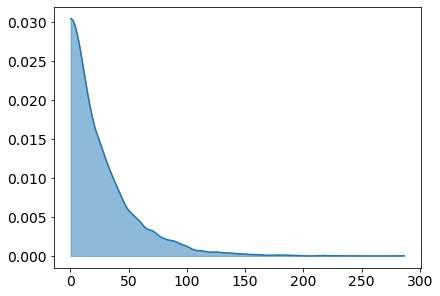

In [20]:
μ_m = y.value.mean()
μ_s = y.value.std() * 2

with pm.Model() as model:
    group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
    group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)
    
σ_low = 1
σ_high = 10

with model:
    group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)
    
with model:
    ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={"alpha": 0.5});

In [21]:
with model:
    λ1 = group1_std ** -2
    λ2 = group2_std ** -2

    group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
    group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

In [22]:
with model:
    diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
    effect_size = pm.Deterministic(
        "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
    )

In [23]:
with model:
    trace = pm.sample(2000)

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_me

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 790 seconds.


C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


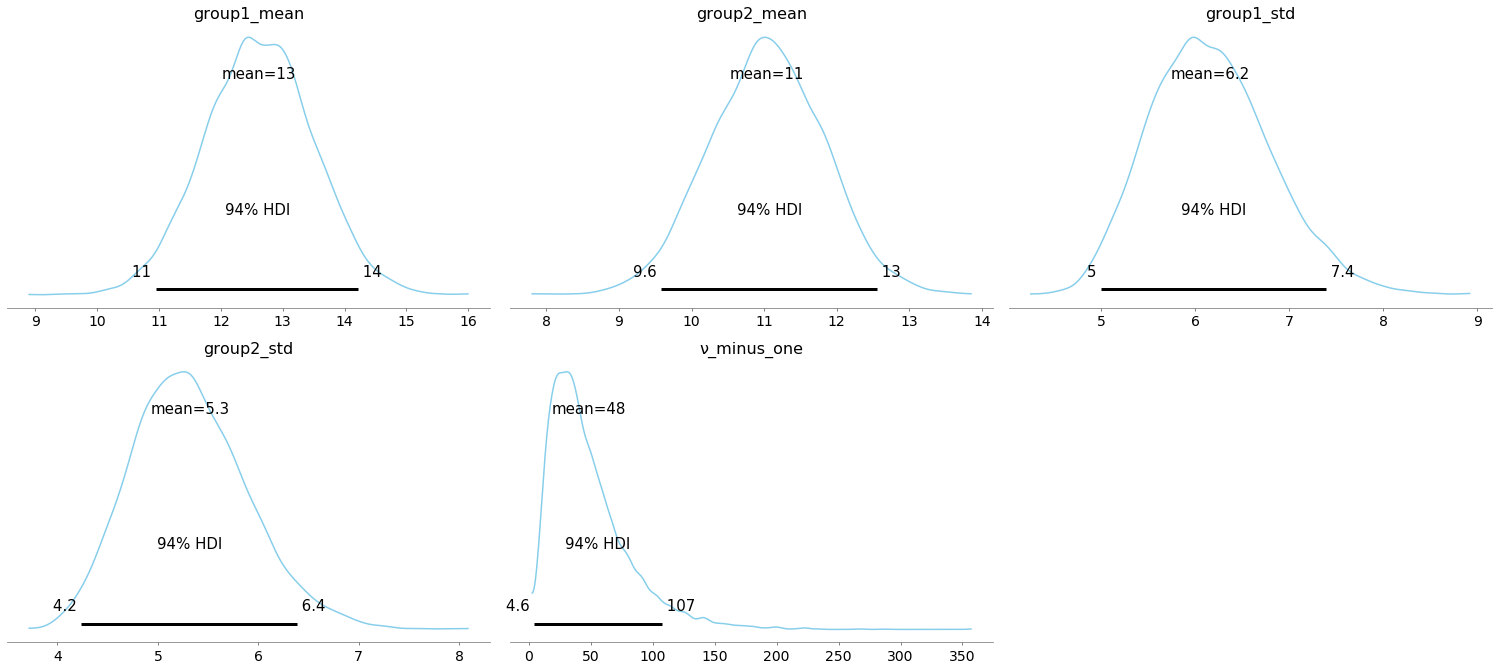

In [24]:
pm.plot_posterior(
    trace,
    var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "ν_minus_one"],
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


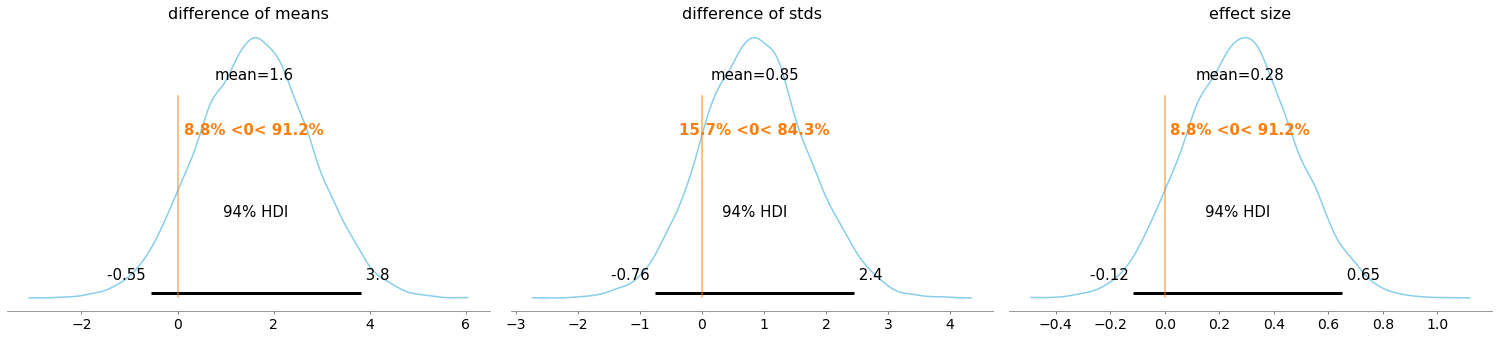

In [25]:
pm.plot_posterior(
    trace,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


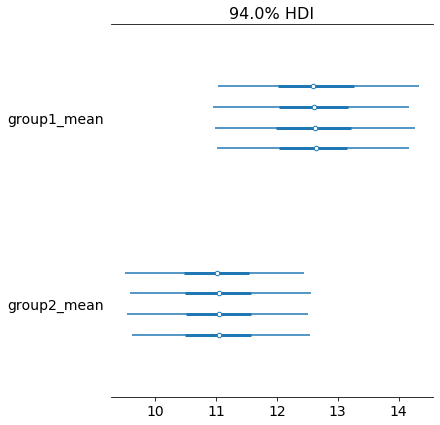

In [26]:
pm.forestplot(trace, var_names=["group1_mean", "group2_mean"]);

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


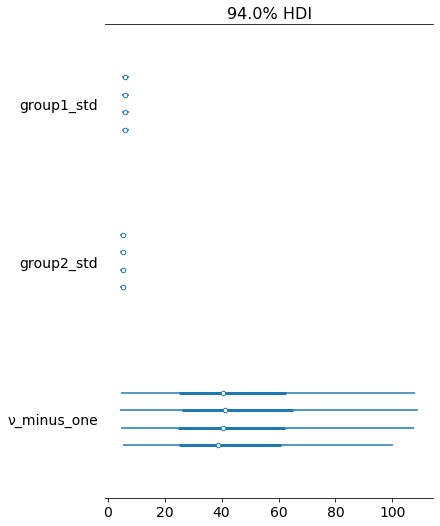

In [27]:
pm.forestplot(trace, var_names=["group1_std", "group2_std", "ν_minus_one"]);

In [28]:
pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"])

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
difference of means,1.588,1.172,-0.553,3.812,0.012,0.010,8811.0,5728.0,1.0
difference of stds,0.847,0.858,-0.759,2.449,0.009,0.008,8525.0,5801.0,1.0
effect size,0.277,0.205,-0.115,0.651,0.002,0.002,8719.0,6136.0,1.0


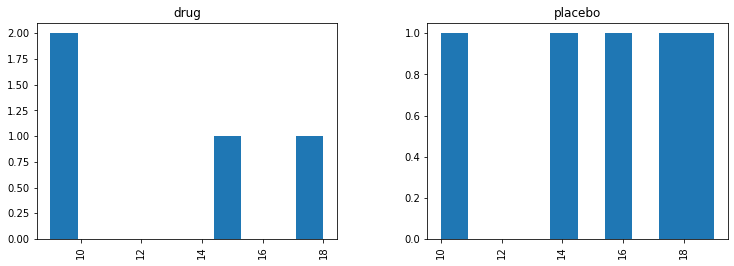

In [6]:
drug = otherST9
placebo = otherC9

y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(
    dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
)

y.hist("value", by="group", figsize=(12, 4));

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The function `kdeplot` from PyMC3 is just an alias for `plot_kde` from ArviZ. Please switch to `pymc3.plot_kde` or `arviz.plot_kde`.


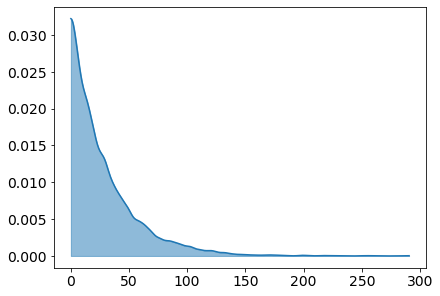

In [7]:
μ_m = y.value.mean()
μ_s = y.value.std() * 2

with pm.Model() as model:
    group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
    group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)
    
σ_low = 1
σ_high = 10

with model:
    group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)
    
with model:
    ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={"alpha": 0.5});

In [8]:
with model:
    λ1 = group1_std ** -2
    λ2 = group2_std ** -2

    group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
    group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

In [9]:
with model:
    diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
    effect_size = pm.Deterministic(
        "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
    )

In [10]:
with model:
    trace = pm.sample(2000)

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_me

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 173 seconds.


C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


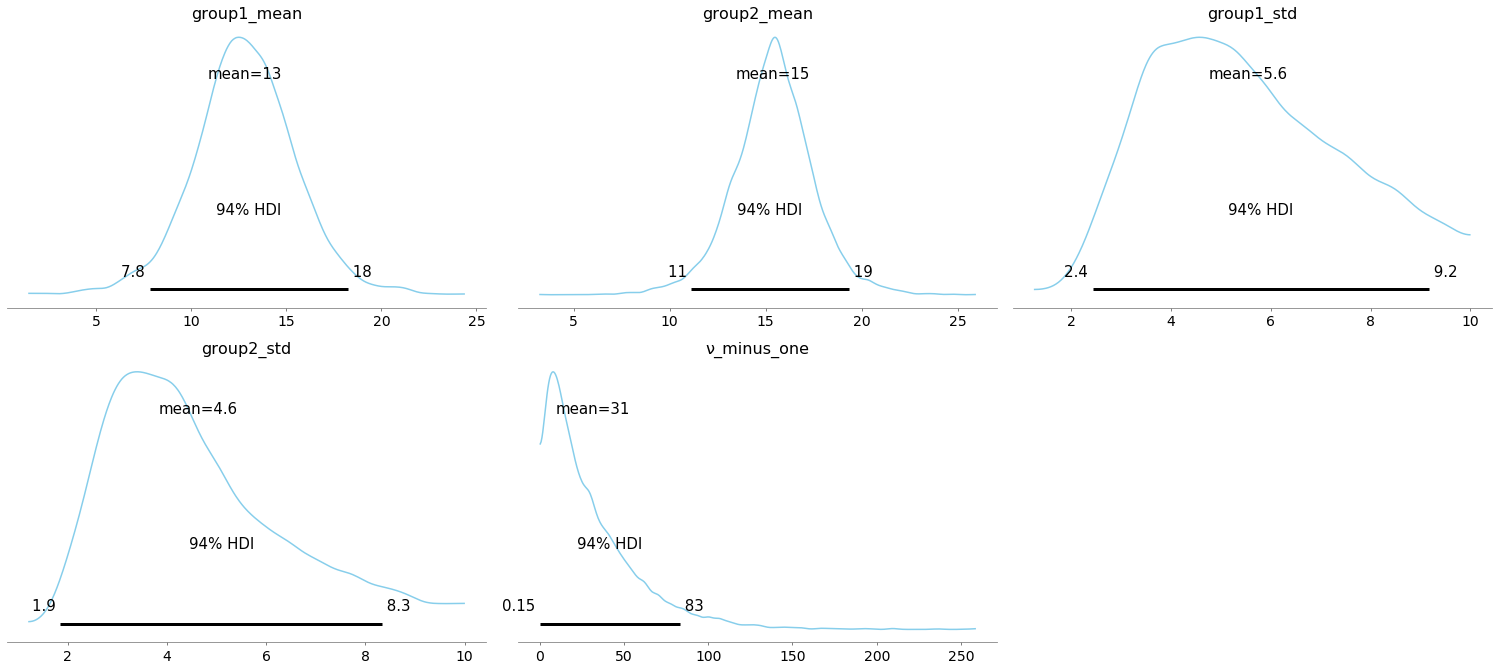

In [11]:
pm.plot_posterior(
    trace,
    var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "ν_minus_one"],
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


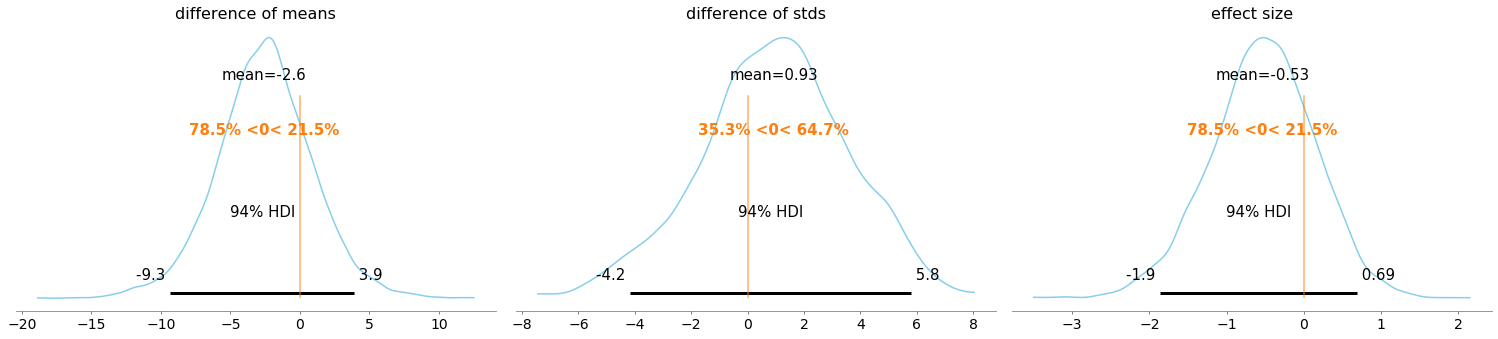

In [12]:
pm.plot_posterior(
    trace,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


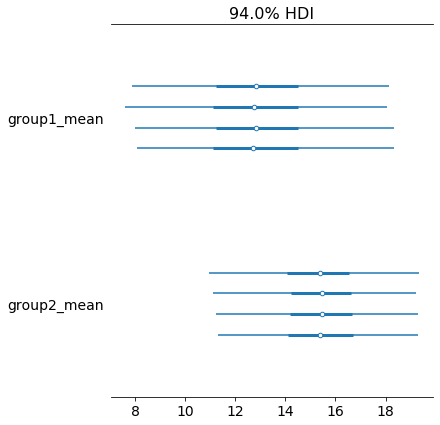

In [13]:
pm.forestplot(trace, var_names=["group1_mean", "group2_mean"]);

In [14]:
pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"])

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
difference of means,-2.568,3.468,-9.311,3.908,0.048,0.037,5259.0,4815.0,1.0
difference of stds,0.927,2.612,-4.153,5.790,0.040,0.029,4230.0,4276.0,1.0
effect size,-0.534,0.682,-1.866,0.686,0.009,0.007,5632.0,5724.0,1.0
